In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [64]:
file_path = r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\Downtown_Parking_Lots.csv'

In [65]:
data = pd.read_csv( r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\Downtown_Parking_Lots.csv')


In [66]:
print("Original Data:")
print(data.head())

Original Data:
   OBJECTID  FACILITYID  INTID  SALESFORCEID  SUBTYPEID  \
0         2           2      2           0.0        0.0   
1         4           4      4           0.0        0.0   
2         5           5      5           0.0        0.0   
3         6           6      6           0.0        0.0   
4         7           7      7           0.0        NaN   

                                     NAME                         ADDRESS  \
0          SJ State University 7th Street                                   
1  SJ State University 10th Street Garage                                   
2               Cahill Lot 4 (Caltrain 4)   4 Cahill Street, San Jose, CA   
3               Cahill Lot 2 (Caltrain 2)  21 Cahill Street, San Jose, CA   
4               Cahill Lot 3 (Caltrain 3)                71 Cahill Street   

          OWNERSHIP  TOTALSPACECOUNT  EVSPACECOUNT  ...  PARKINGTYPE  \
0      SJSU Parking           1980.0           NaN  ...          NaN   
1      SJSU Parking    

In [67]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
OBJECTID               0
FACILITYID             0
INTID                  0
SALESFORCEID          50
SUBTYPEID             47
NAME                   0
ADDRESS                0
OWNERSHIP              0
TOTALSPACECOUNT        3
EVSPACECOUNT          81
ADASPACECOUNT         81
RESERVEDSPACECOUNT    82
VALIDATION            59
PARKINGTYPE           59
NUMBEROFLEVELS        81
PERMITS                3
BIPLEASE               3
BIPAREA                3
CREATIONDATE          48
LASTUPDATE             0
NOTES                  0
SHAPE_Length           0
SHAPE_Area             0
dtype: int64


In [82]:
imputer = SimpleImputer(strategy='most_frequent')  # You can choose other strategies like 'median', 'most_frequent', etc.
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [86]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data_imputed' is your DataFrame after imputation
numerical_features = data_imputed.select_dtypes(include=['float64', 'int64']).columns

# Check for missing values in the selected numerical features
if data_imputed[numerical_features].isnull().any().any():
    # Impute missing values using mean imputation (you can choose other strategies)
    imputer_numeric = SimpleImputer(strategy='mean')
    data_imputed[numerical_features] = imputer_numeric.fit_transform(data_imputed[numerical_features])

# Standardize the numerical features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed[numerical_features]), columns=numerical_features)

ValueError: at least one array or dtype is required

In [87]:
print("\nPreprocessed Data:")
print(data_imputed.head())

# Save the preprocessed data to a new CSV file
data_imputed.to_csv('preprocessed_data.csv', index=False)


Preprocessed Data:
  OBJECTID FACILITYID INTID SALESFORCEID SUBTYPEID  \
0        2          2     2          0.0       0.0   
1        4          4     4          0.0       0.0   
2        5          5     5          0.0       0.0   
3        6          6     6          0.0       0.0   
4        7          7     7          0.0       0.0   

                                     NAME                         ADDRESS  \
0          SJ State University 7th Street                                   
1  SJ State University 10th Street Garage                                   
2               Cahill Lot 4 (Caltrain 4)   4 Cahill Street, San Jose, CA   
3               Cahill Lot 2 (Caltrain 2)  21 Cahill Street, San Jose, CA   
4               Cahill Lot 3 (Caltrain 3)                71 Cahill Street   

          OWNERSHIP TOTALSPACECOUNT EVSPACECOUNT  ... PARKINGTYPE  \
0      SJSU Parking          1980.0          6.0  ...         Lot   
1      SJSU Parking          1490.0          6.0  ... 

Exploratory Data analysis.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
file_path = 'Downtown_Parking_lots.csv'
data = pd.read_csv(file_path)

In [90]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            89 non-null     int64  
 1   FACILITYID          89 non-null     int64  
 2   INTID               89 non-null     int64  
 3   SALESFORCEID        39 non-null     float64
 4   SUBTYPEID           42 non-null     float64
 5   NAME                89 non-null     object 
 6   ADDRESS             89 non-null     object 
 7   OWNERSHIP           89 non-null     object 
 8   TOTALSPACECOUNT     86 non-null     float64
 9   EVSPACECOUNT        8 non-null      float64
 10  ADASPACECOUNT       8 non-null      float64
 11  RESERVEDSPACECOUNT  7 non-null      float64
 12  VALIDATION          30 non-null     object 
 13  PARKINGTYPE         30 non-null     object 
 14  NUMBEROFLEVELS      8 non-null      float64
 15  PERMITS             86 non-null     fl

In [91]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        OBJECTID  FACILITYID      INTID  SALESFORCEID  SUBTYPEID  \
count  89.000000   89.000000  89.000000          39.0       42.0   
mean   48.089888   48.089888  48.089888           0.0        0.0   
std    26.323875   26.323875  26.323875           0.0        0.0   
min     2.000000    2.000000   2.000000           0.0        0.0   
25%    26.000000   26.000000  26.000000           0.0        0.0   
50%    48.000000   48.000000  48.000000           0.0        0.0   
75%    70.000000   70.000000  70.000000           0.0        0.0   
max    93.000000   93.000000  93.000000           0.0        0.0   

       TOTALSPACECOUNT  EVSPACECOUNT  ADASPACECOUNT  RESERVEDSPACECOUNT  \
count        86.000000      8.000000       8.000000            7.000000   
mean        411.348837      6.375000      12.625000           13.285714   
std         469.776437      2.774244       5.475595            7.653197   
min          13.000000      0.000000       3.000000            2.0

In [92]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
OBJECTID               0
FACILITYID             0
INTID                  0
SALESFORCEID          50
SUBTYPEID             47
NAME                   0
ADDRESS                0
OWNERSHIP              0
TOTALSPACECOUNT        3
EVSPACECOUNT          81
ADASPACECOUNT         81
RESERVEDSPACECOUNT    82
VALIDATION            59
PARKINGTYPE           59
NUMBEROFLEVELS        81
PERMITS                3
BIPLEASE               3
BIPAREA                3
CREATIONDATE          48
LASTUPDATE             0
NOTES                  0
SHAPE_Length           0
SHAPE_Area             0
dtype: int64


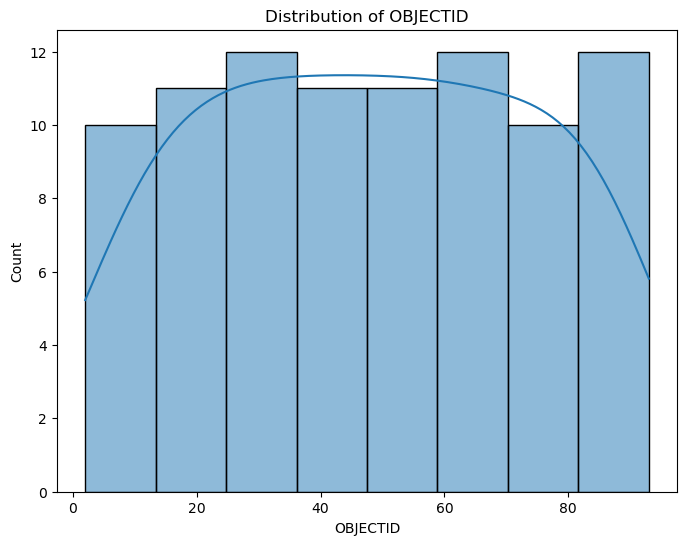

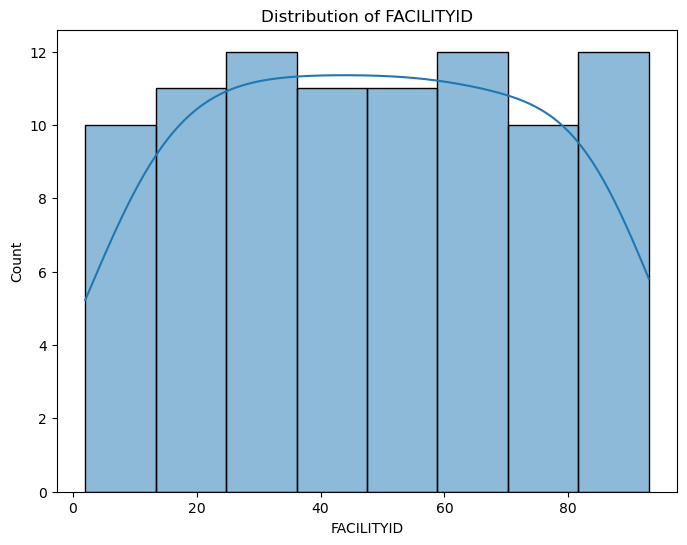

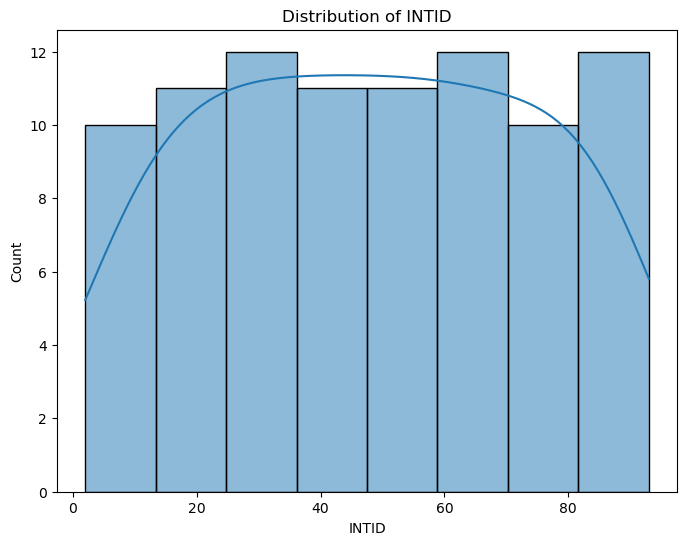

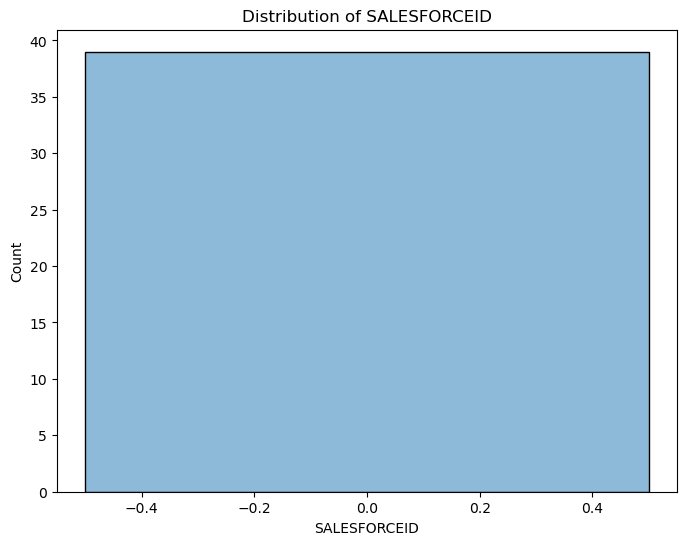

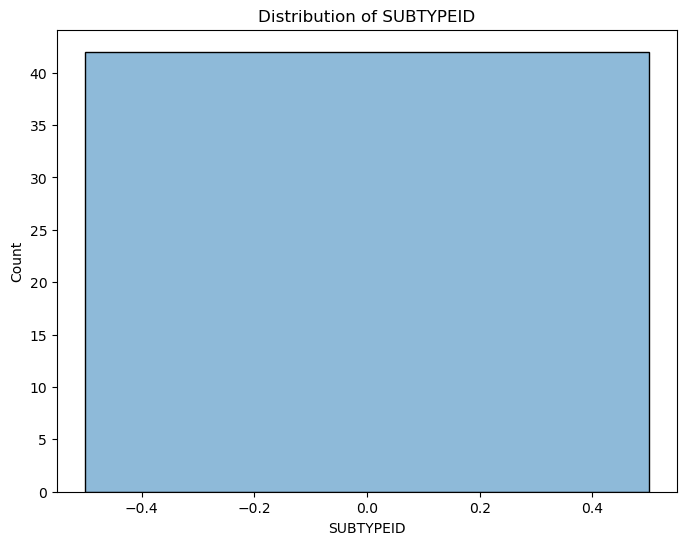

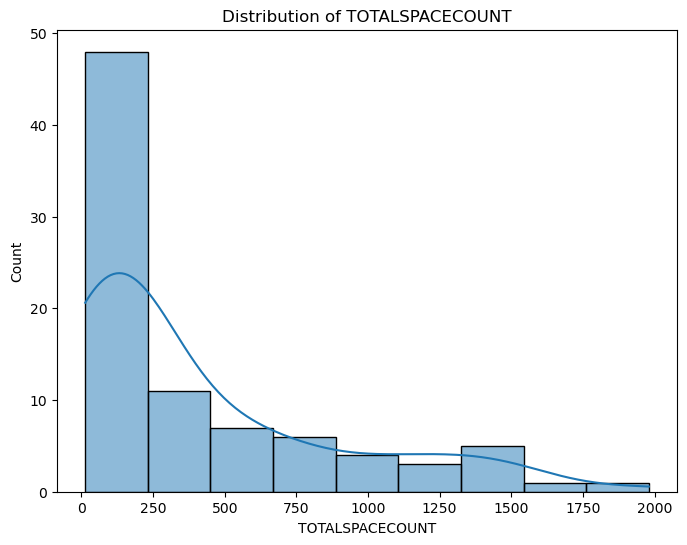

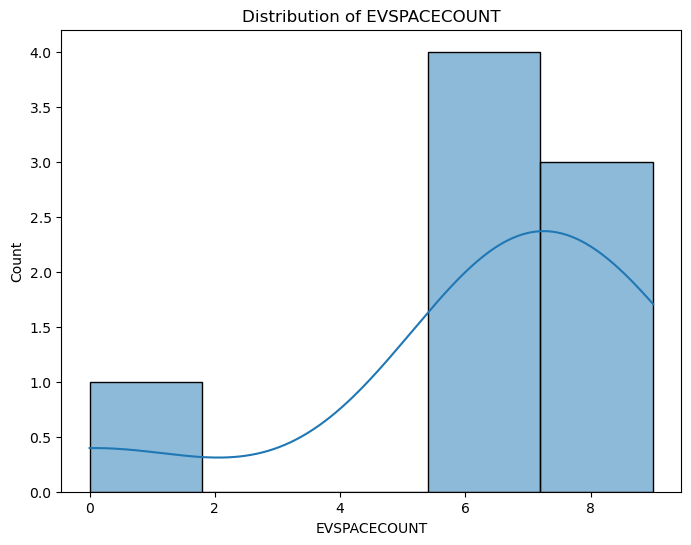

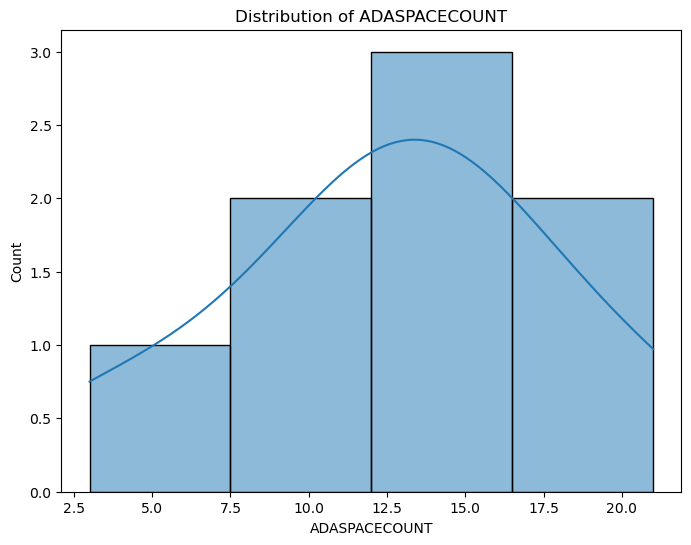

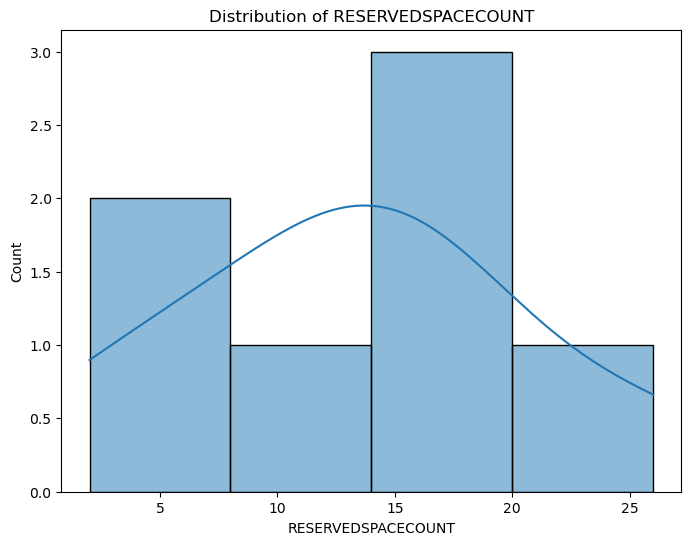

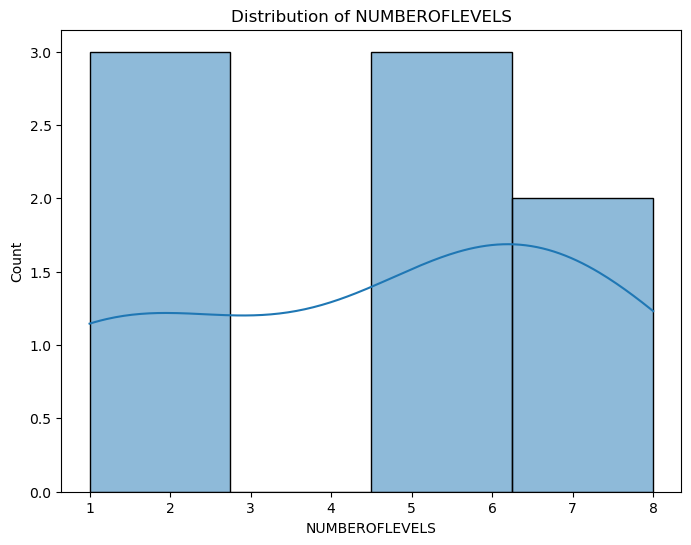

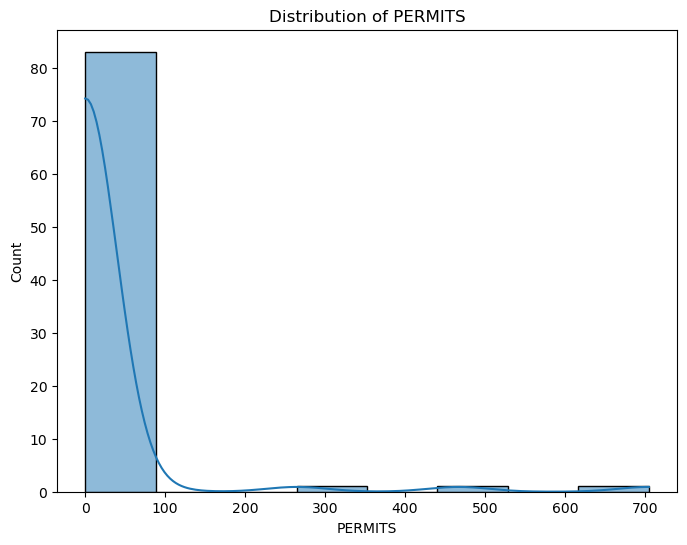

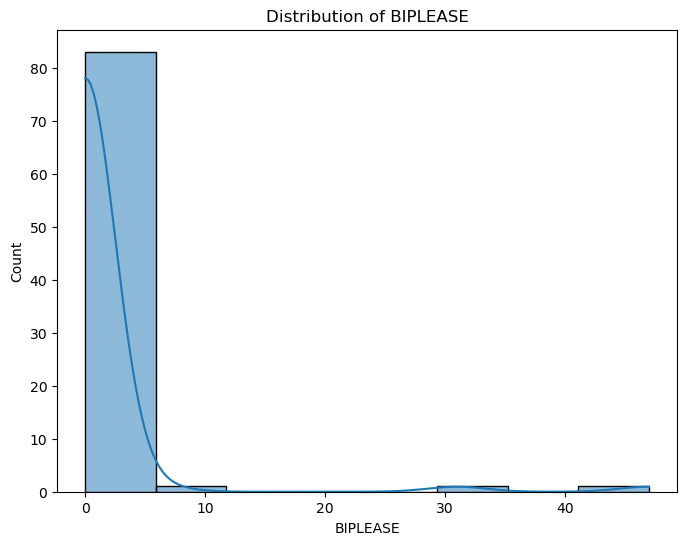

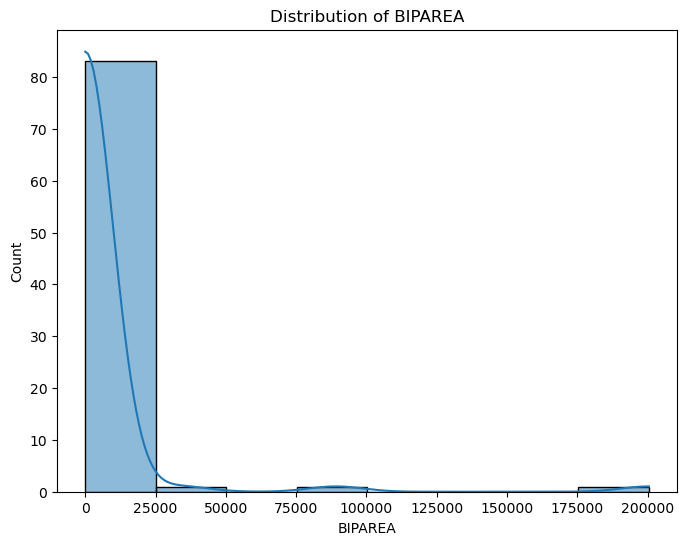

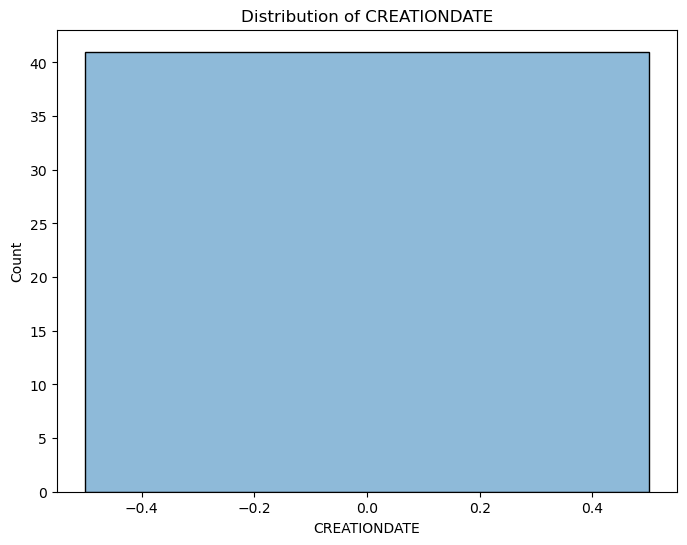

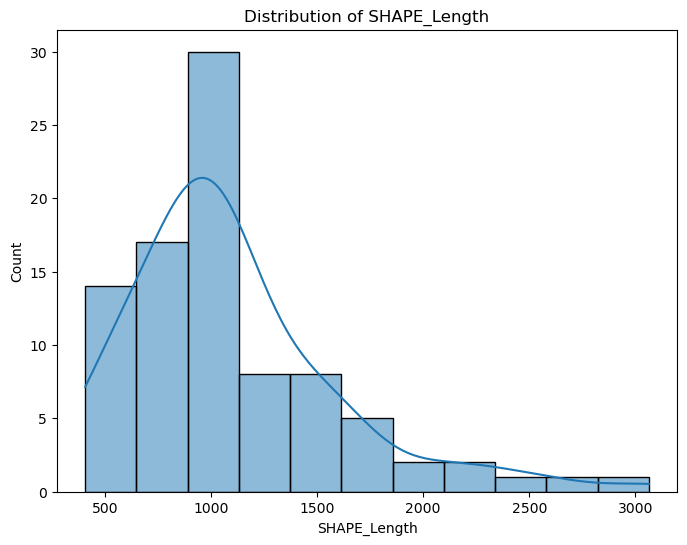

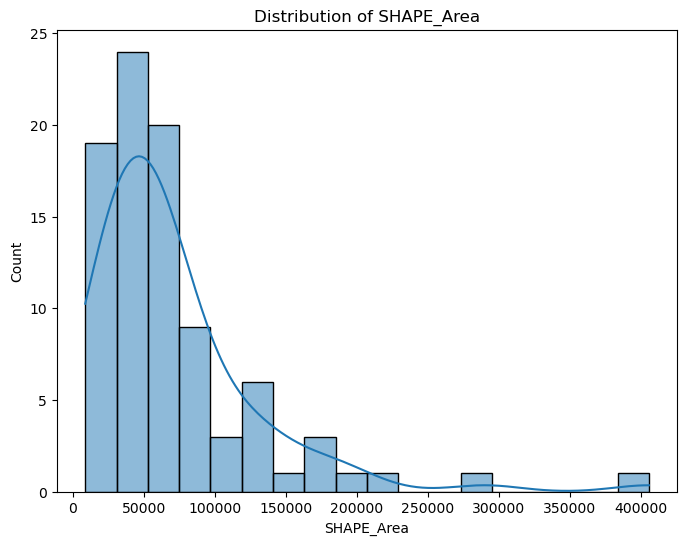

In [95]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

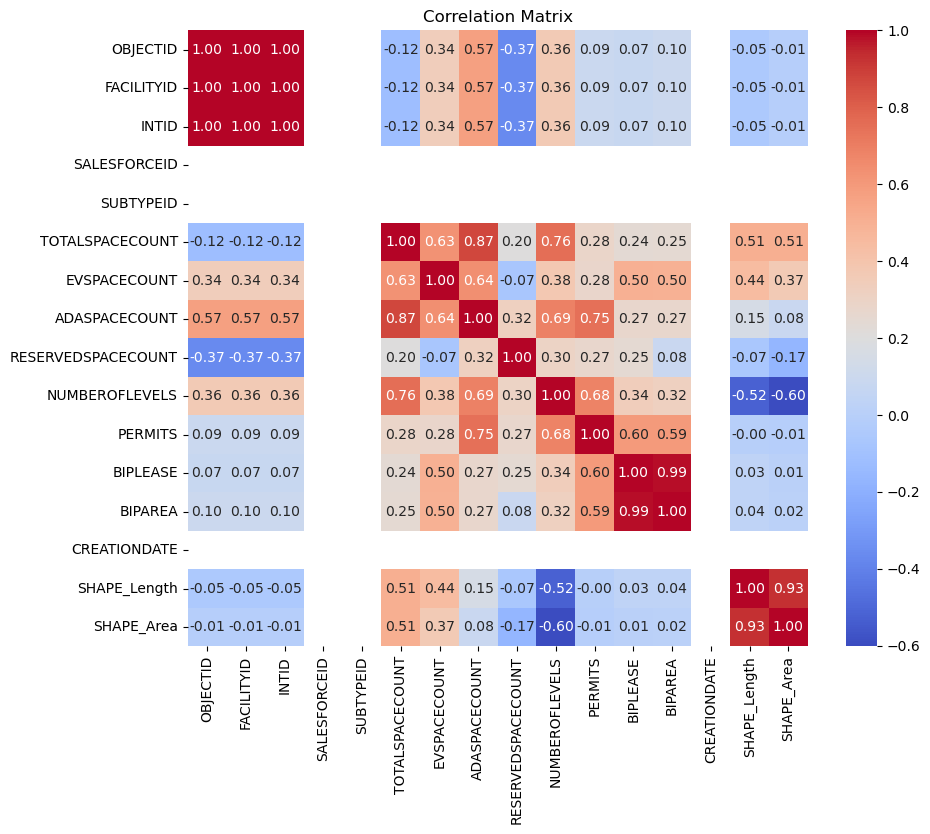

In [96]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Jayesh vala\anaconda3\envs\ML\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


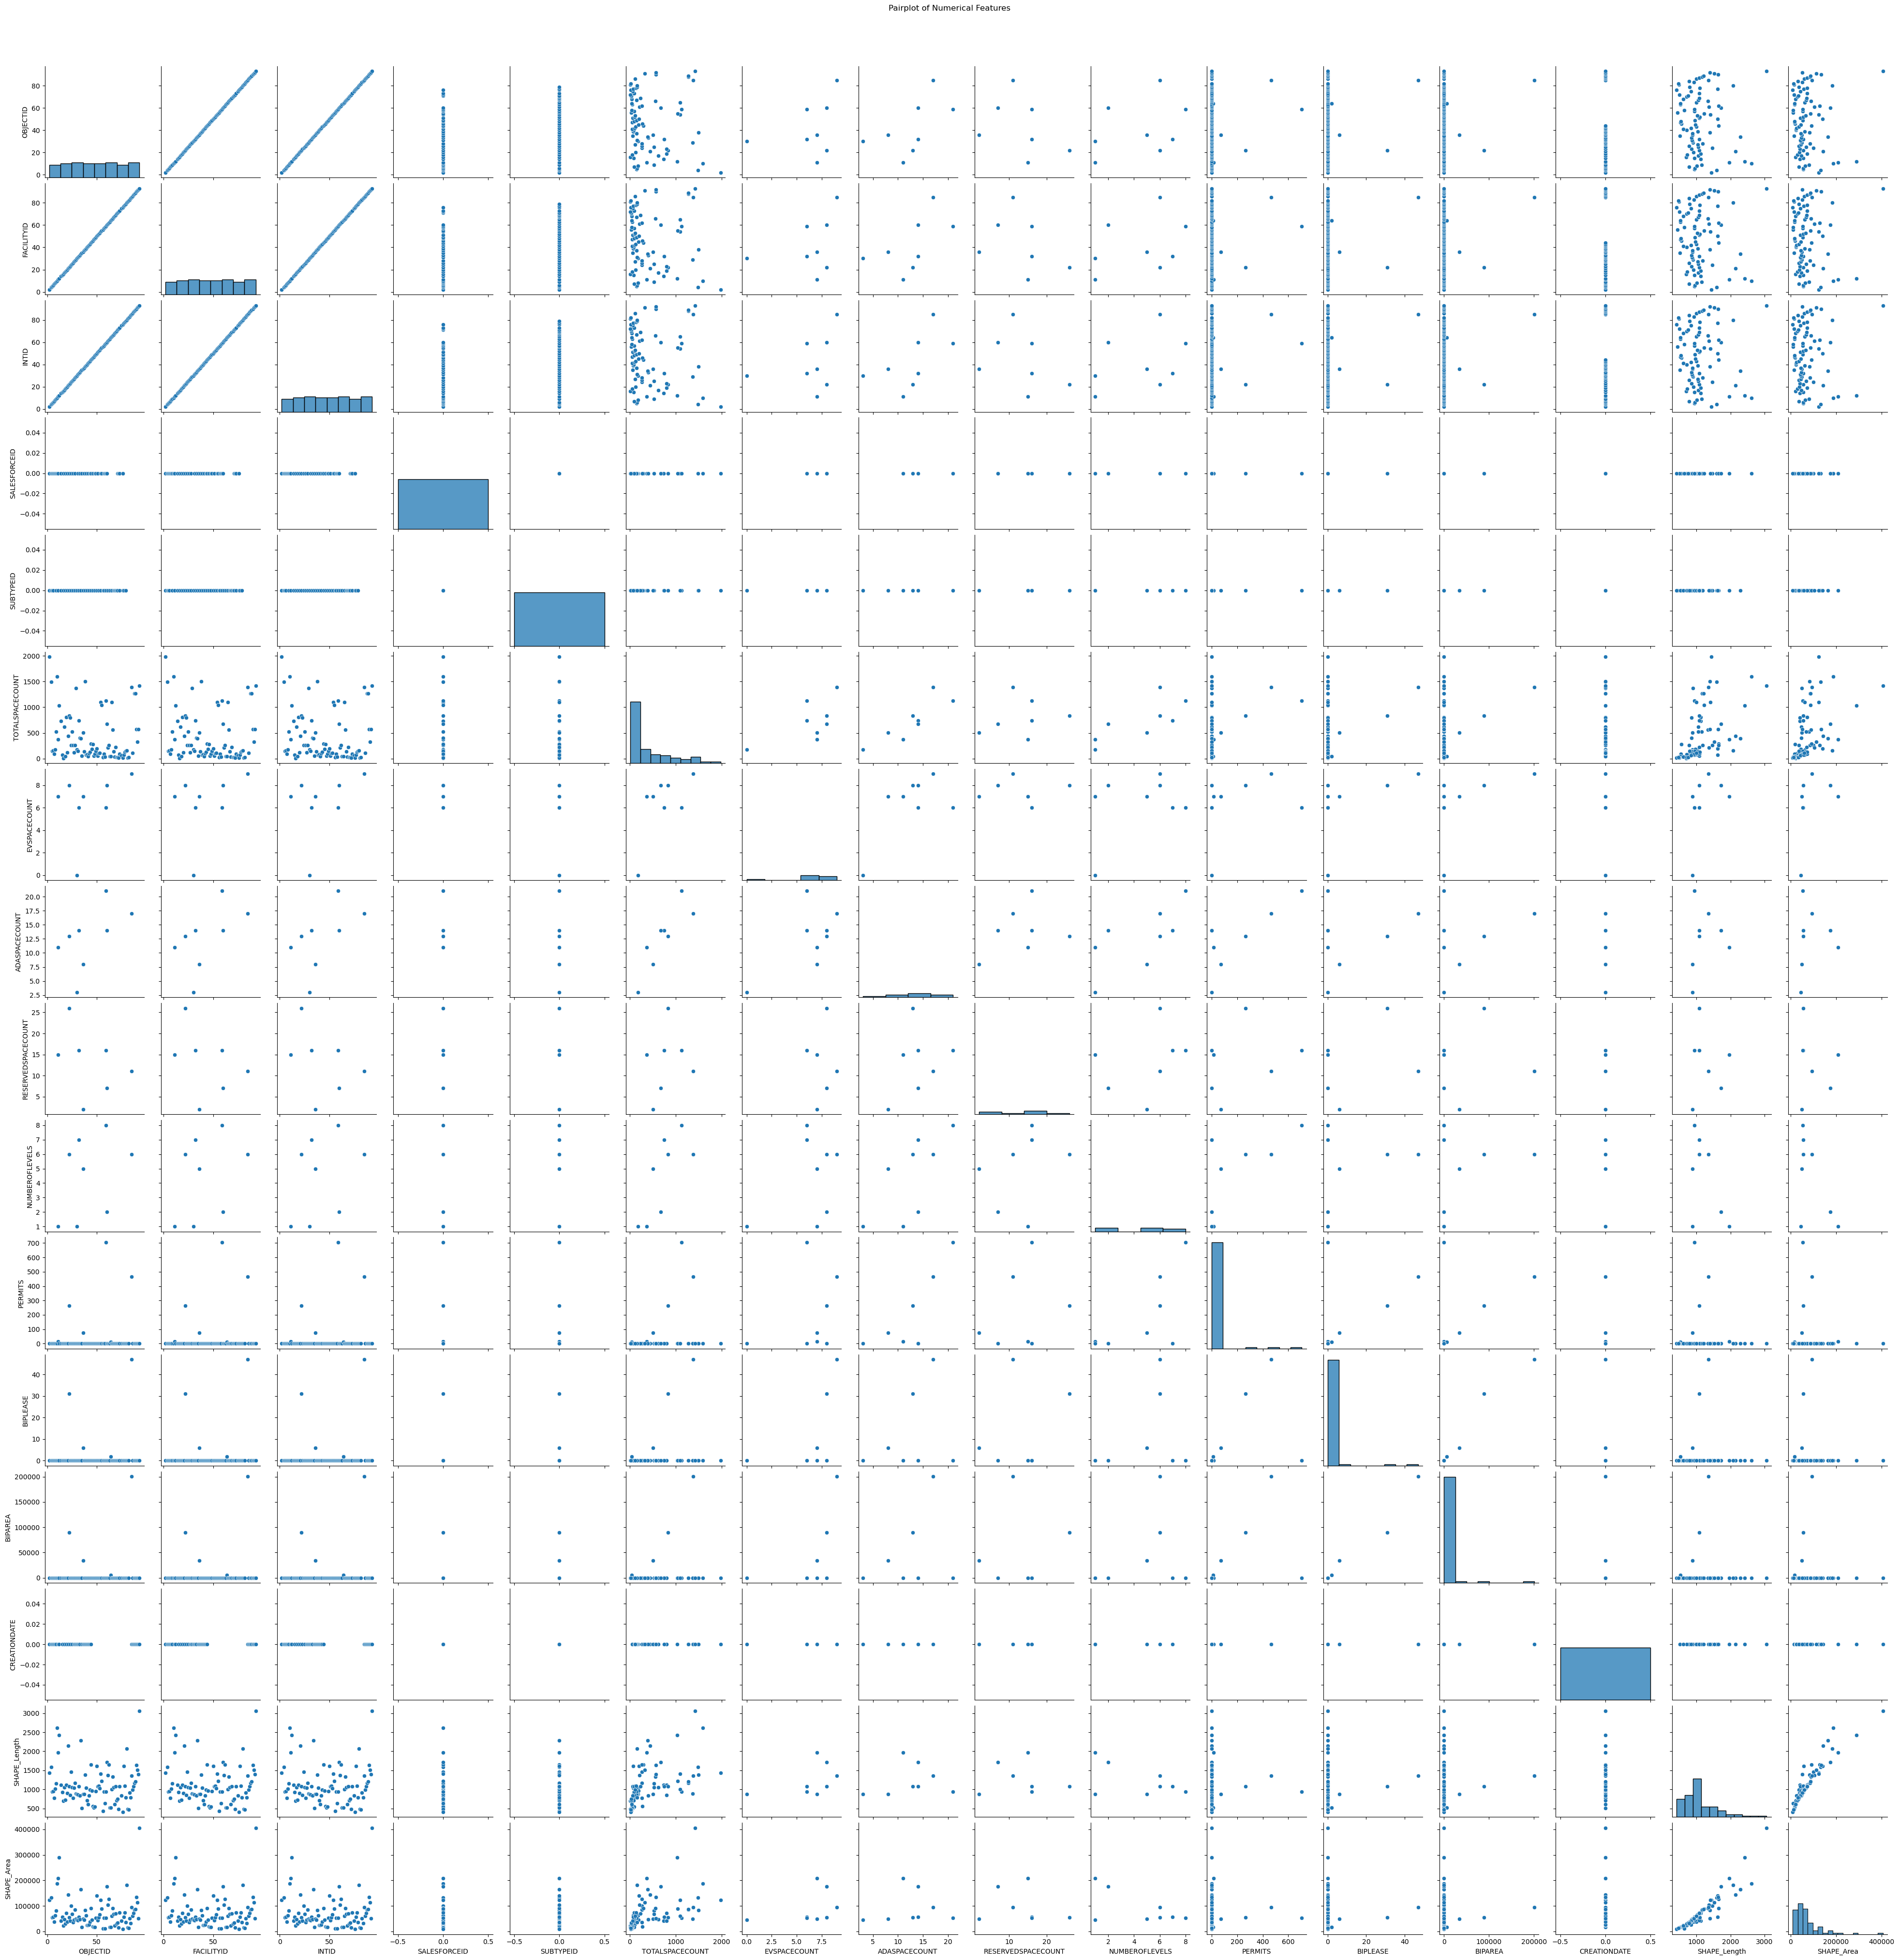

In [97]:
sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


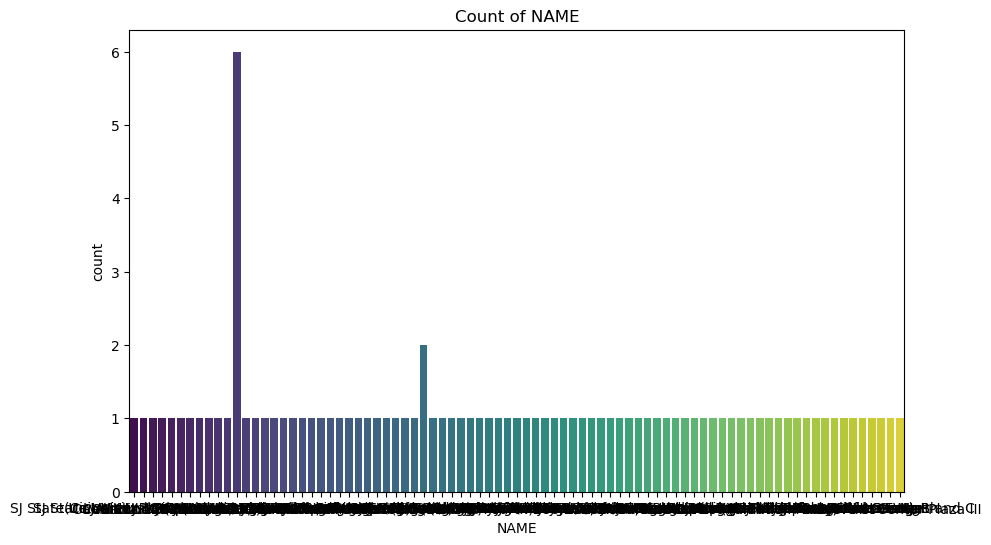

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


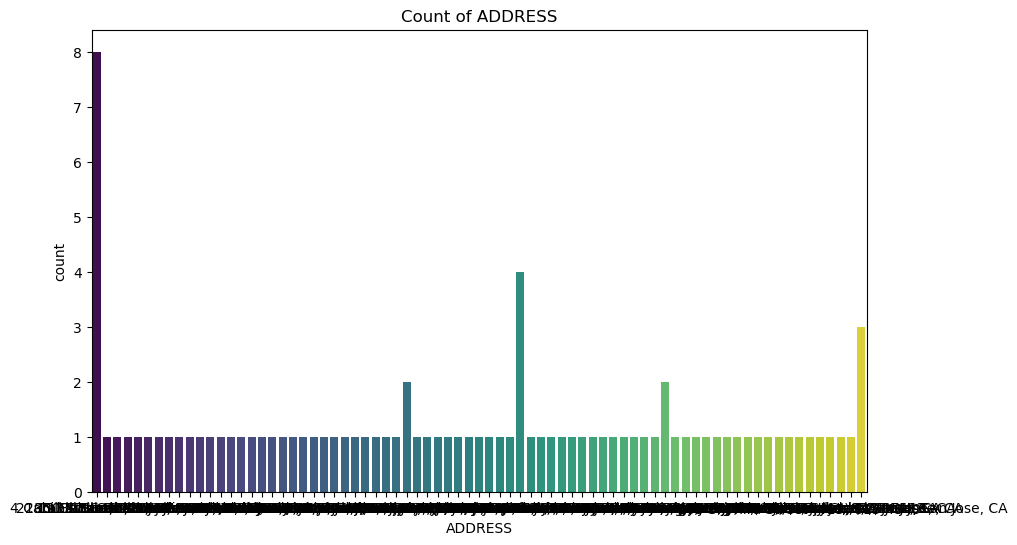

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


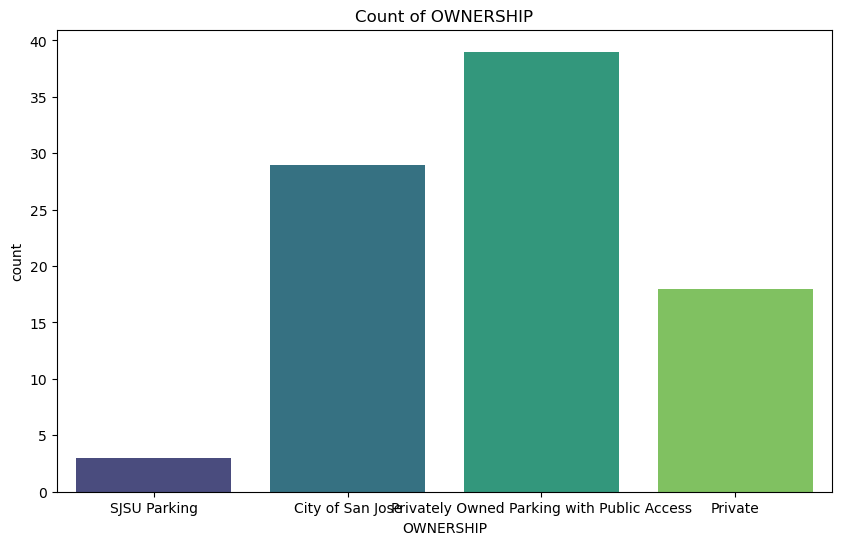

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


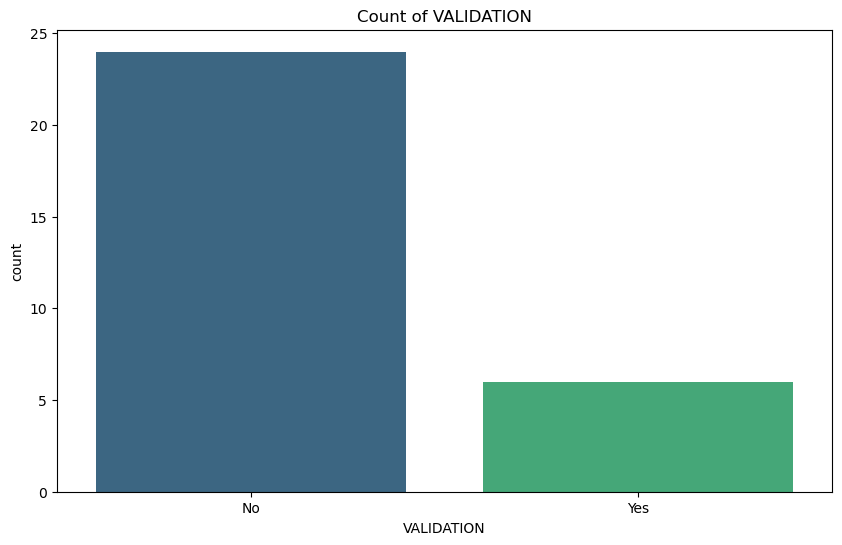

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


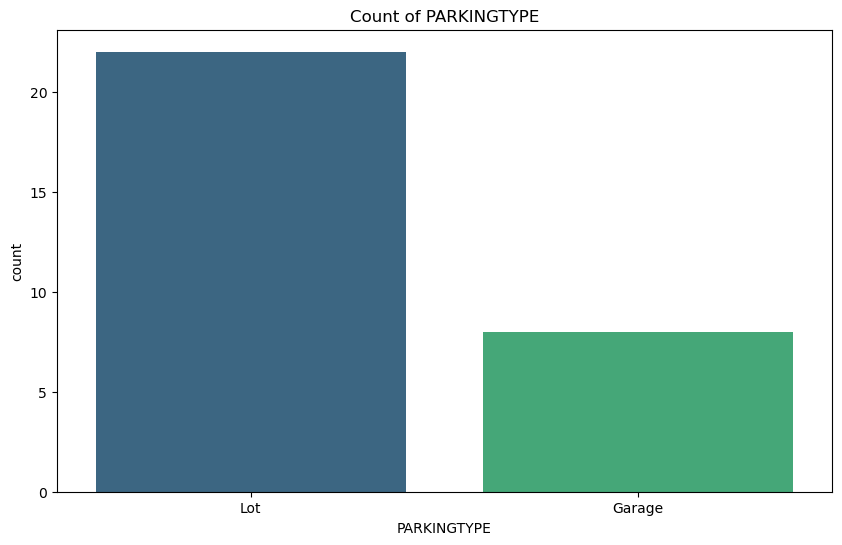

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


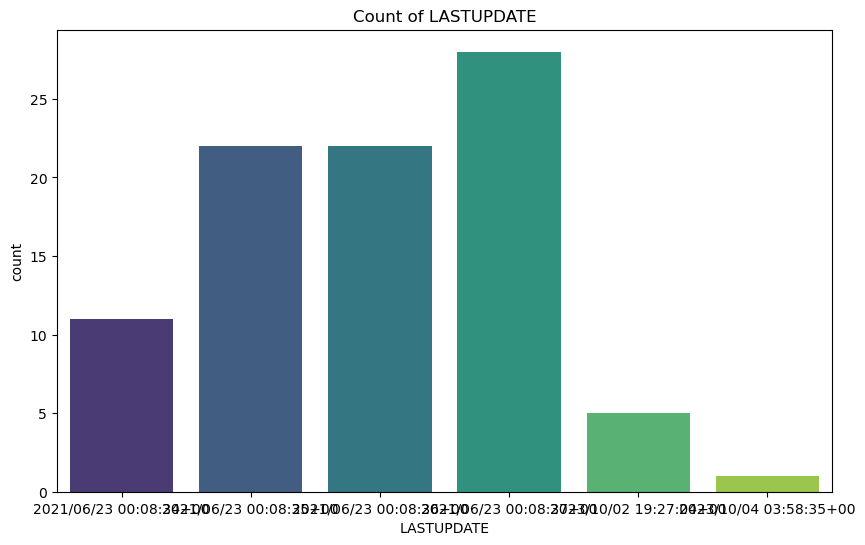

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_25452\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


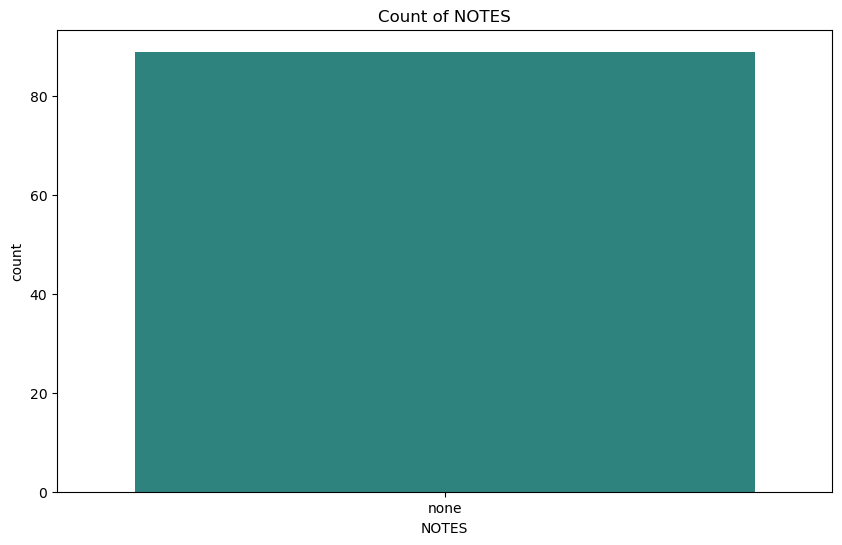

In [98]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, palette="viridis")
    plt.title(f'Count of {feature}')
    plt.show()